In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# importing required libraries
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#Regression rolling average

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Soccer_data_raw/soccer_datasets/soccer_prediction_preprocessed.csv",index_col=0)
df

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,match_date,match_time
0,37770,Kasper Schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,1,0,0,0,0,0,0,0,2017-01-14,17:30:00
1,23571,Wes Morgan,0,90.0,0.0,0.0,32.0,25.0,1.0,1.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
2,38899,Robert Huth,0,60.0,0.0,0.0,17.0,13.0,4.0,2.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
3,43061,Christian Fuchs,1,90.0,0.0,0.0,37.0,25.0,7.0,4.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
4,139671,Marc Albrighton,0,77.0,0.0,0.0,35.0,15.0,13.0,1.0,...,0,0,0,0,0,1,0,0,2017-01-14,17:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Sean Longstaff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00
84864,189982,Fabian Schär,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00
84865,864983,Jamal Lewis,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00
84866,299984,Javier Manquillo,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00


In [ ]:
#dataframe columns
dtypes_dict = df.dtypes.to_dict()
dtypes_dict


{'id': dtype('int64'),
 'name.fullName': dtype('O'),
 'stats.shotsOnTarget': dtype('int64'),
 'stats.minutesPlayed': dtype('float64'),
 'stats.saves': dtype('float64'),
 'stats.goalsConceded': dtype('float64'),
 'stats.passesAttempted': dtype('float64'),
 'stats.passesCompleted': dtype('float64'),
 'stats.longBallsAttempted': dtype('float64'),
 'stats.longBallsCompleted': dtype('float64'),
 'stats.keeperDivingSave': dtype('float64'),
 'stats.savesInsideBox': dtype('float64'),
 'stats.keeperSweeper': dtype('float64'),
 'stats.punches': dtype('float64'),
 'stats.playerThrows': dtype('float64'),
 'stats.keeperHighClaim': dtype('float64'),
 'stats.recoveries': dtype('float64'),
 'stats.touches': dtype('float64'),
 'stats.goals': dtype('float64'),
 'stats.assists': dtype('float64'),
 'stats.totalShots': dtype('float64'),
 'stats.chancesCreated': dtype('float64'),
 'stats.passesIntoFinalThird': dtype('float64'),
 'stats.dispossessed': dtype('float64'),
 'stats.tacklesAttempted': dtype('float

In [ ]:
df['match_datetime'] = pd.to_datetime(df.match_datetime, format='%Y-%m-%d %H:%M:%S')
df['match_date'] = pd.to_datetime(df['match_datetime'].dt.date)
df['match_time'] = df['match_datetime'].dt.time

In [ ]:
df['match_date']

0       2017-01-14
1       2017-01-14
2       2017-01-14
3       2017-01-14
4       2017-01-14
           ...    
84863   2021-11-06
84864   2021-11-06
84865   2021-11-06
84866   2021-11-06
84867   2021-11-06
Name: match_date, Length: 84868, dtype: datetime64[ns]

In [ ]:
df

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,match_date,match_time
0,37770,Kasper Schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,1,0,0,0,0,0,0,0,2017-01-14,17:30:00
1,23571,Wes Morgan,0,90.0,0.0,0.0,32.0,25.0,1.0,1.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
2,38899,Robert Huth,0,60.0,0.0,0.0,17.0,13.0,4.0,2.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
3,43061,Christian Fuchs,1,90.0,0.0,0.0,37.0,25.0,7.0,4.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
4,139671,Marc Albrighton,0,77.0,0.0,0.0,35.0,15.0,13.0,1.0,...,0,0,0,0,0,1,0,0,2017-01-14,17:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Sean Longstaff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00
84864,189982,Fabian Schär,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00
84865,864983,Jamal Lewis,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00
84866,299984,Javier Manquillo,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00


In [ ]:
def filter_player(player):
  #player = player.lower()
  player_df = df[df['name.fullName'] == player]

  return player_df


In [ ]:
df = filter_player('Kasper Schmeichel')
df

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,match_date,match_time
0,37770,Kasper Schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,1,0,0,0,0,0,0,0,2017-01-14,17:30:00
504,37770,Kasper Schmeichel,0,90.0,6.0,1.0,27.0,11.0,26.0,11.0,...,1,0,0,0,0,0,0,0,2017-02-27,20:00:00
1008,37770,Kasper Schmeichel,0,90.0,5.0,1.0,29.0,12.0,27.0,10.0,...,1,0,0,0,0,0,0,0,2016-10-22,14:00:00
1504,37770,Kasper Schmeichel,0,90.0,3.0,2.0,42.0,22.0,34.0,15.0,...,1,0,0,0,0,0,0,0,2017-05-13,11:30:00
2483,37770,Kasper Schmeichel,0,57.0,2.0,0.0,25.0,9.0,21.0,6.0,...,1,0,0,0,0,0,0,0,2016-08-27,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83861,37770,Kasper Schmeichel,0,90.0,5.0,2.0,46.0,32.0,24.0,11.0,...,1,0,0,0,0,0,0,0,2021-12-01,19:30:00
84101,37770,Kasper Schmeichel,0,90.0,4.0,1.0,23.0,16.0,13.0,6.0,...,1,0,0,0,0,0,0,0,2022-04-02,16:30:00
84191,37770,Kasper Schmeichel,0,90.0,2.0,2.0,29.0,19.0,18.0,9.0,...,1,0,0,0,0,0,0,0,2021-09-25,14:00:00
84351,37770,Kasper Schmeichel,0,90.0,3.0,0.0,32.0,26.0,11.0,5.0,...,1,0,0,0,0,0,0,0,2021-08-14,14:00:00


In [ ]:
## Individual Performance Metrics
df['goals_scored_avg'] = df.groupby('id')['stats.goals'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
df['passes_completed_avg'] = df.groupby('id')['stats.passesCompleted'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())

# Efficiency Metrics
#df['passing_accuracy'] = df['stats.passesCompleted'] / df['stats.passesAttempted']
#df['shot_accuracy'] = df['stats.shotsOnTarget'] / df['stats.shots']

# Team Performance Metrics
# df['team_goals_scored_avg'] = df.groupby('id')['team.goalsScored'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
# df['team_goals_conceded_avg'] = df.groupby('id')['team.goalsConceded'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Opponent Metrics
df['opponent_goals_conceded_avg'] = df.groupby('id')['stats.goalsConceded'].transform(lambda x: x.expanding().mean())

# Time-Related Metrics
#df['days_since_last_match'] = df.groupby('id')['match_date'].diff().dt.days
df['matches_in_last_week'] = df.groupby('id')['match_date'].diff().rolling(window=10).count()


<ipython-input-74-8bf975c507b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['goals_scored_avg'] = df.groupby('id')['stats.goals'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
<ipython-input-74-8bf975c507b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passes_completed_avg'] = df.groupby('id')['stats.passesCompleted'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
<ipython-input-74-8bf975c507b1>:14: SettingWithCopyWarning: 
A value is trying to be set on a 

In [ ]:
df

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,match_date,match_time,goals_scored_avg,passes_completed_avg,opponent_goals_conceded_avg,matches_in_last_week
0,37770,Kasper Schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,0,0,0,0,2017-01-14,17:30:00,0.0,11.000000,3.000000,0.0
504,37770,Kasper Schmeichel,0,90.0,6.0,1.0,27.0,11.0,26.0,11.0,...,0,0,0,0,2017-02-27,20:00:00,0.0,11.000000,2.000000,1.0
1008,37770,Kasper Schmeichel,0,90.0,5.0,1.0,29.0,12.0,27.0,10.0,...,0,0,0,0,2016-10-22,14:00:00,0.0,11.333333,1.666667,2.0
1504,37770,Kasper Schmeichel,0,90.0,3.0,2.0,42.0,22.0,34.0,15.0,...,0,0,0,0,2017-05-13,11:30:00,0.0,14.000000,1.750000,3.0
2483,37770,Kasper Schmeichel,0,57.0,2.0,0.0,25.0,9.0,21.0,6.0,...,0,0,0,0,2016-08-27,14:00:00,0.0,13.000000,1.400000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83861,37770,Kasper Schmeichel,0,90.0,5.0,2.0,46.0,32.0,24.0,11.0,...,0,0,0,0,2021-12-01,19:30:00,0.0,18.400000,1.360190,10.0
84101,37770,Kasper Schmeichel,0,90.0,4.0,1.0,23.0,16.0,13.0,6.0,...,0,0,0,0,2022-04-02,16:30:00,0.0,18.600000,1.358491,10.0
84191,37770,Kasper Schmeichel,0,90.0,2.0,2.0,29.0,19.0,18.0,9.0,...,0,0,0,0,2021-09-25,14:00:00,0.0,20.500000,1.361502,10.0
84351,37770,Kasper Schmeichel,0,90.0,3.0,0.0,32.0,26.0,11.0,5.0,...,0,0,0,0,2021-08-14,14:00:00,0.0,21.300000,1.355140,10.0


In [ ]:
columns = ['id','name.fullName','leagueName','stadium','match_datetime','team.name'
,'team.id','team.type','position_Attacker','position_Defender','position_Keeper','position_Midfielder','position_Substitute'
,'role_Attacker','role_Defender', 'role_Keeper','role_Midfielder','localizedPosition.key_NONE','localizedPosition.key_centerattackingmidfielder_short'
,'localizedPosition.key_centerback_short','localizedPosition.key_centerdefensivemidfielder_short',
 'localizedPosition.key_centerforward_short',
 'localizedPosition.key_centermidfielder_short',
 'localizedPosition.key_keeper',
 'localizedPosition.key_leftback_short',
 'localizedPosition.key_leftmidfielder_short',
 'localizedPosition.key_leftwinger_short',
 'localizedPosition.key_rightback_short',
 'localizedPosition.key_rightmidfielder_short',
 'localizedPosition.key_rightwinger_short',
 'localizedPosition.key_striker_short',
 'match_date',
 'match_time','stats.passesCompleted','goals_scored_avg','passes_completed_avg'
  ,'opponent_goals_conceded_avg','matches_in_last_week'    ]

In [ ]:
df = pd.DataFrame(df,columns=columns)
# y = df['stats.passesCompleted']

In [ ]:
df.isnull().sum()

id                                                       0
name.fullName                                            0
leagueName                                               0
stadium                                                  0
match_datetime                                           0
team.name                                                0
team.id                                                  0
team.type                                                0
position_Attacker                                        0
position_Defender                                        0
position_Keeper                                          0
position_Midfielder                                      0
position_Substitute                                      0
role_Attacker                                            0
role_Defender                                            0
role_Keeper                                              0
role_Midfielder                                         

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_list=['name.fullName', 'leagueName', 'stadium', 'team.type', 'team.name']
df.drop('match_datetime',inplace=True,axis=1)
df.drop(['match_time'],axis=1,inplace=True)
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x))

In [ ]:
df.sort_values('match_date', inplace=True)

df.set_index('match_date', inplace=True)

n_splits = 5

In [ ]:
tscv = TimeSeriesSplit(n_splits=n_splits)

for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]

# Separate features and target variable
X_train, y_train = train.drop(columns=['stats.passesCompleted']), train['stats.passesCompleted']
X_test, y_test = test.drop(columns=['stats.passesCompleted']), test['stats.passesCompleted']

# Train your model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)



print("Linear Regressor")
print("R2 Score: ", round(r2,3))
print("RMSE: ", round(rmse,3))
print("MAE: ", round(mae,3))

Linear Regressor
R2 Score:  0.093
RMSE:  6.402
MAE:  4.823


In [ ]:
X_train

,id,name.fullName,leagueName,stadium,team.name,team.id,team.type,position_Attacker,position_Defender,position_Keeper,...,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,goals_scored_avg,passes_completed_avg,opponent_goals_conceded_avg,matches_in_last_week
match_date,,,,,,,,,,,,,,,,,,,,,
2016-08-13,37770,0,0,12,0,8197,0,0,0,1,...,0,0,0,0,0,0,0.0,12.6,1.500000,10.0
2016-08-20,37770,0,0,13,0,8197,1,0,0,1,...,0,0,0,0,0,0,0.0,12.1,1.500000,10.0
2016-08-27,37770,0,0,13,0,8197,1,0,0,1,...,0,0,0,0,0,0,0.0,13.0,1.400000,4.0
2016-09-10,37770,0,0,0,0,8197,0,0,0,1,...,0,0,0,0,0,0,0.0,10.8,1.434783,10.0
2016-10-02,37770,0,0,13,0,8197,1,0,0,1,...,0,0,0,0,0,0,0.0,12.1,1.500000,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-18,37770,0,0,24,0,8197,0,0,0,1,...,0,0,0,0,0,0,0.0,17.9,1.308219,10.0
2021-05-23,37770,0,0,13,0,8197,1,0,0,1,...,0,0,0,0,0,0,0.0,18.5,1.335714,10.0
2021-08-14,37770,0,0,13,0,8197,1,0,0,1,...,0,0,0,0,0,0,0.0,21.3,1.355140,10.0


In [ ]:
y_pred = model.predict(sm.add_constant(X_test))

# Create a DataFrame with actual and predicted values side by side
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame with actual and predicted values
print(result_df)

            Actual  Predicted
match_date                   
2021-09-11    32.0  22.447355
2021-09-19    16.0  20.337860
2021-09-25    19.0  20.795435
2021-10-03    19.0  20.940203
2021-10-16    34.0  22.852457
2021-10-24    21.0  21.818919
2021-10-30    33.0  21.437406
2021-11-07    26.0  21.185412
2021-11-20    21.0  18.974409
2021-11-28    21.0  18.859593
2021-12-01    32.0  18.023791
2021-12-05    11.0  17.465882
2021-12-12    16.0  20.347278
2021-12-26    20.0  20.376331
2021-12-28    17.0  22.234867
2022-01-19    25.0  18.631994
2022-01-23    15.0  18.332816
2022-02-10    16.0  20.511979
2022-02-13    19.0  23.060437
2022-02-20    20.0  19.010454
2022-03-01    17.0  20.586016
2022-03-05    22.0  23.431820
2022-03-13    23.0  19.190931
2022-03-20    26.0  20.713091
2022-04-02    16.0  18.581674
2022-04-10    20.0  21.108329
2022-04-17    19.0  18.095742
2022-04-20    30.0  21.099095
2022-04-23    14.0  22.550921
2022-05-01    13.0  16.635220
2022-05-08    16.0  20.724284
2022-05-11

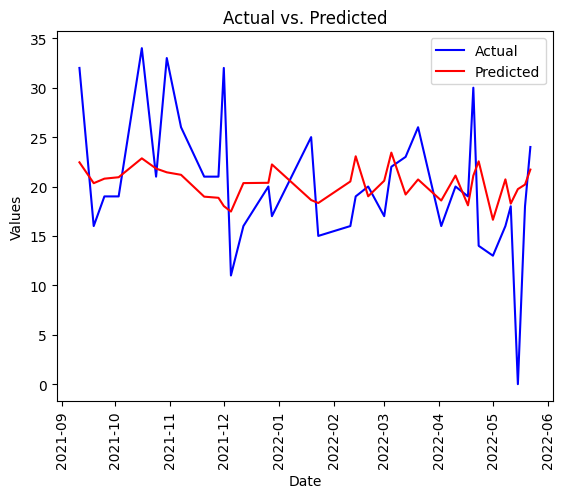

In [ ]:
plt.plot(result_df.index, result_df['Actual'], label='Actual', color='blue')
plt.plot(result_df.index, result_df['Predicted'], label='Predicted', color='red')

# Formatting (same as above)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs. Predicted')
plt.xticks(rotation=90)
plt.legend()
plt.show()



# Time Series

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Soccer_data_raw/soccer_datasets/soccer_prediction_preprocessed.csv",index_col=0)
df

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,match_date,match_time
0,37770,Kasper Schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,1,0,0,0,0,0,0,0,2017-01-14,17:30:00
1,23571,Wes Morgan,0,90.0,0.0,0.0,32.0,25.0,1.0,1.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
2,38899,Robert Huth,0,60.0,0.0,0.0,17.0,13.0,4.0,2.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
3,43061,Christian Fuchs,1,90.0,0.0,0.0,37.0,25.0,7.0,4.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
4,139671,Marc Albrighton,0,77.0,0.0,0.0,35.0,15.0,13.0,1.0,...,0,0,0,0,0,1,0,0,2017-01-14,17:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Sean Longstaff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00
84864,189982,Fabian Schär,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00
84865,864983,Jamal Lewis,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00
84866,299984,Javier Manquillo,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2021-11-06,17:30:00


# KNN

In [ ]:
tscv = TimeSeriesSplit(n_splits=n_splits)

for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]

# Separate features and target variable
x_train, y_train = train.drop(columns=['stats.passesCompleted']), train['stats.passesCompleted']
x_test, y_test = test.drop(columns=['stats.passesCompleted']), test['stats.passesCompleted']

In [ ]:
# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=10, weights = 'distance', algorithm = 'brute')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)


print("KNN Regressor")
print("R2 Score: ", round(r2,3))
print("RMSE: ", round(rmse,3))
print("MAE: ", round(mae,3))

KNN Regressor
R2 Score:  0.152
RMSE:  6.189
MAE:  4.552


#Decision Tree regressor

In [ ]:
# Decision Tree Regressor
dtr = tree.DecisionTreeRegressor(criterion='squared_error',  splitter='best')
dtr = dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)


print("Decision Tree Regressor")
print("R2 Score: ", round(r2,3))
print("RMSE: ", round(rmse,3))
print("MAE: ", round(mae,3))

Decision Tree Regressor
R2 Score:  -0.67
RMSE:  8.683
MAE:  6.657


Support Vector Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your feature matrix and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVR model
svr = SVR()

# Define the parameter grid for grid search
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1]}

# Perform grid search
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_svr = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svr.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')


R2 Score: 0.085
RMSE: 6.428
MAE: 4.701
